In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Datasets/Fruit_Veg_Dataset/train'
val_dir = '/content/drive/MyDrive/Datasets/Fruit_Veg_Dataset/validation'
test_dir = '/content/drive/MyDrive/Datasets/Fruit_Veg_Dataset/test'


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     class_mode='categorical',
                                                     shuffle=False)


Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=30,
                    callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 1/98 ━━━━━━━━━━━━━━━━━━━━ 24:11 15s/step - accuracy: 0.0000e+00 - loss: 3.5791

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 1004s 10s/step - accuracy: 0.0414 - loss: 3.7984 - val_accuracy: 0.1225 - val_loss: 3.2675
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 444s 5s/step - accuracy: 0.0890 - loss: 3.2383 - val_accuracy: 0.2365 - val_loss: 2.5935
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 459s 5s/step - accuracy: 0.1412 - loss: 2.9373 - val_accuracy: 0.3618 - val_loss: 2.2924
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 483s 4s/step - accuracy: 0.2161 - loss: 2.7178 - val_accuracy: 0.4188 - val_loss: 1.9978
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 443s 5s/step - accuracy: 0.2496 - loss: 2.5598 - val_accuracy: 0.4587 - val_loss: 1.8604
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.2423 - loss: 2.4910 - val_accuracy: 0.5100 - val_loss: 1.8374
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.2832 - loss: 2.3759 - val_accuracy: 0.5385 - val_loss: 1.5930
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 462s 5s/step - accuracy: 0.3070 - loss: 2.3017 - val_accuracy: 0.4815 - val_loss: 

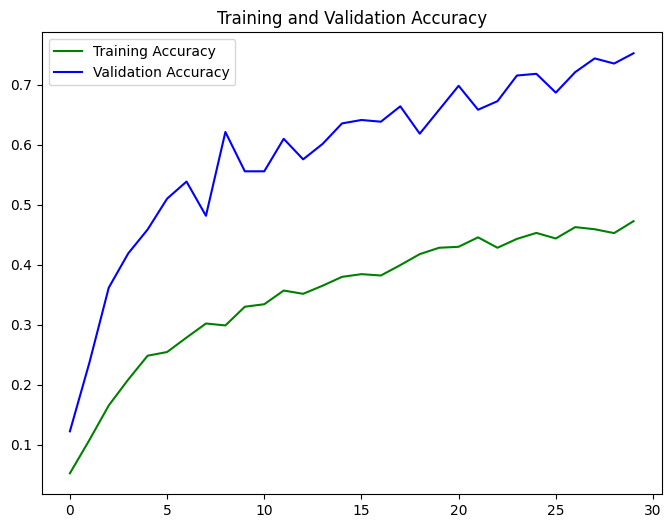

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy', color='green')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='blue')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.7285 - loss: 0.9732
Test accuracy: 0.7353760600090027


12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Classification Report
               precision    recall  f1-score   support

        apple       1.00      0.60      0.75        10
       banana       1.00      0.78      0.88         9
     beetroot       0.77      1.00      0.87        10
  bell pepper       0.78      0.70      0.74        10
      cabbage       0.82      0.90      0.86        10
     capsicum       0.50      0.50      0.50        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      0.80      0.89        10
chilli pepper       0.75      0.60      0.67        10
         corn       0.00      0.00      0.00        10
     cucumber       0.55      0.60      0.57        10
     eggplant       0.89      0.80      0.84        10
       garlic       0.91      1.00      0.95        10
       ginger       0.88      0.70      0.78        10
       grapes       0.88      0.70      0.78        10
     jalepeno       0.60      0.30      0.40        10
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


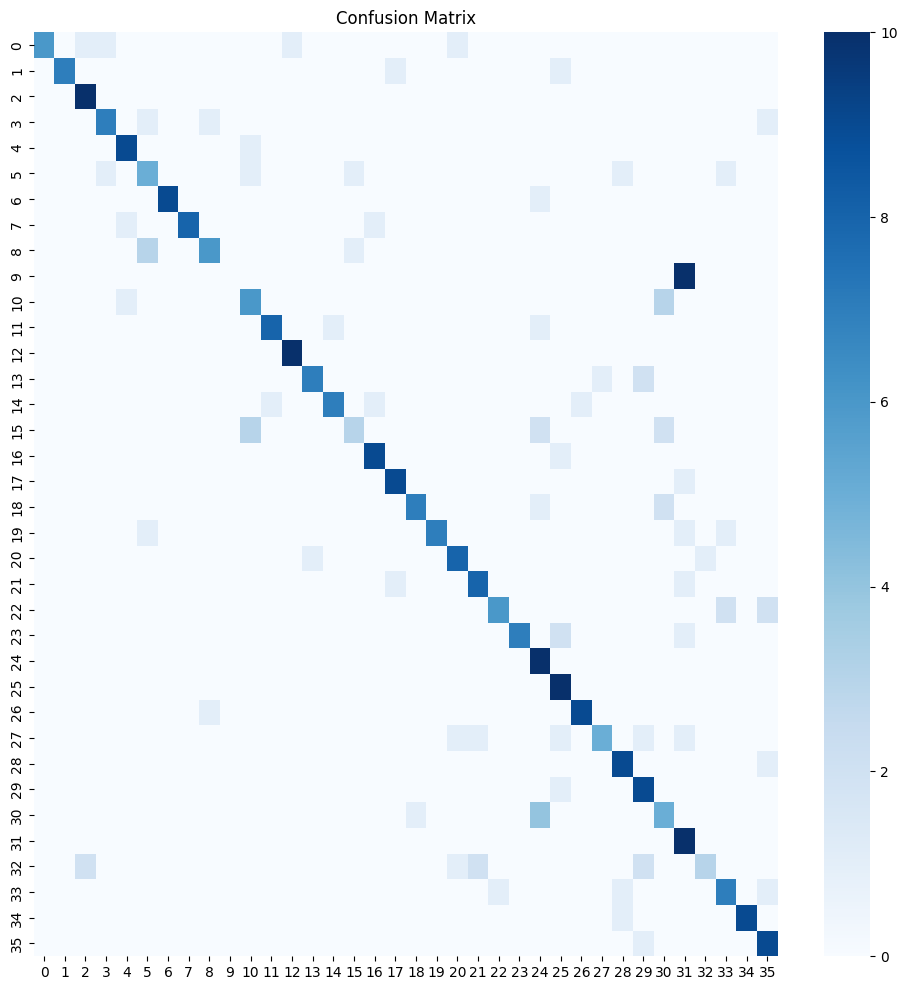

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()


In [41]:

model.save('/content/drive/MyDrive/Datasets/fruit_veg_cnn_model.h5')


In [42]:
model.save('/content/drive/MyDrive/Datasets/fruit_veg_cnn_model.keras')


In [43]:
model.save('/content/drive/MyDrive/Datasets/fruit_veg_cnn_model.keras')


In [44]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7285 - loss: 0.9732
Test Accuracy: 0.7354


12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step
Classification Report:
               precision    recall  f1-score   support

        apple       1.00      0.60      0.75        10
       banana       1.00      0.78      0.88         9
     beetroot       0.77      1.00      0.87        10
  bell pepper       0.78      0.70      0.74        10
      cabbage       0.82      0.90      0.86        10
     capsicum       0.50      0.50      0.50        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      0.80      0.89        10
chilli pepper       0.75      0.60      0.67        10
         corn       0.00      0.00      0.00        10
     cucumber       0.55      0.60      0.57        10
     eggplant       0.89      0.80      0.84        10
       garlic       0.91      1.00      0.95        10
       ginger       0.88      0.70      0.78        10
       grapes       0.88      0.70      0.78        10
     jalepeno       0.60      0.30      0.40        10
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


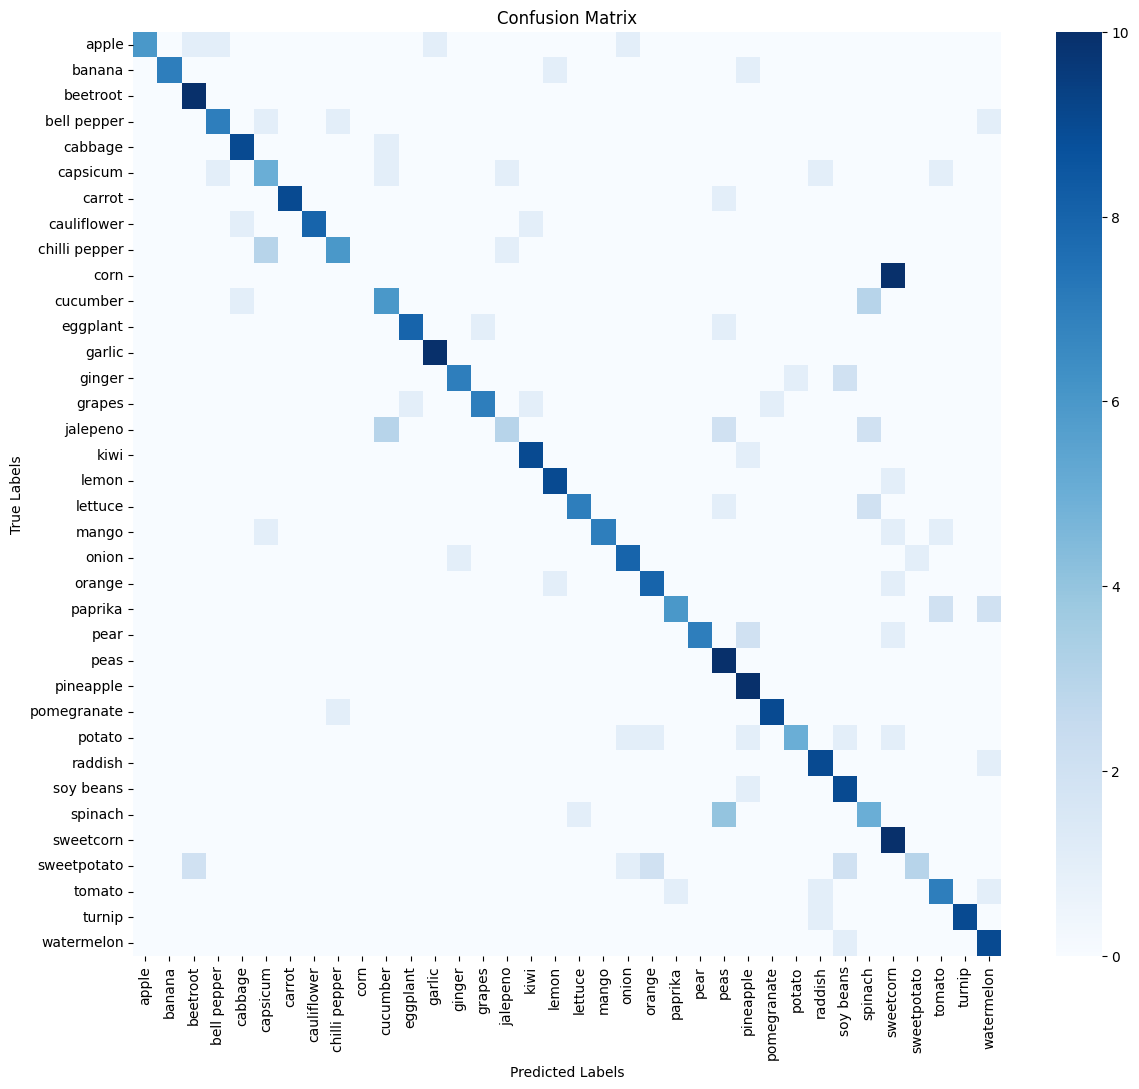

In [45]:
# Predictions on Test Data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Confusion Matrix Heatmap
plt.figure(figsize=(14,12))
sns.heatmap(cm, cmap="Blues", xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


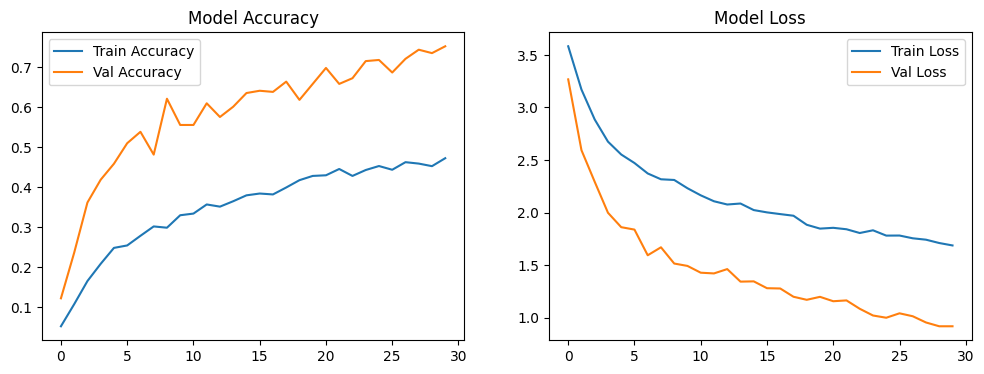

In [46]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


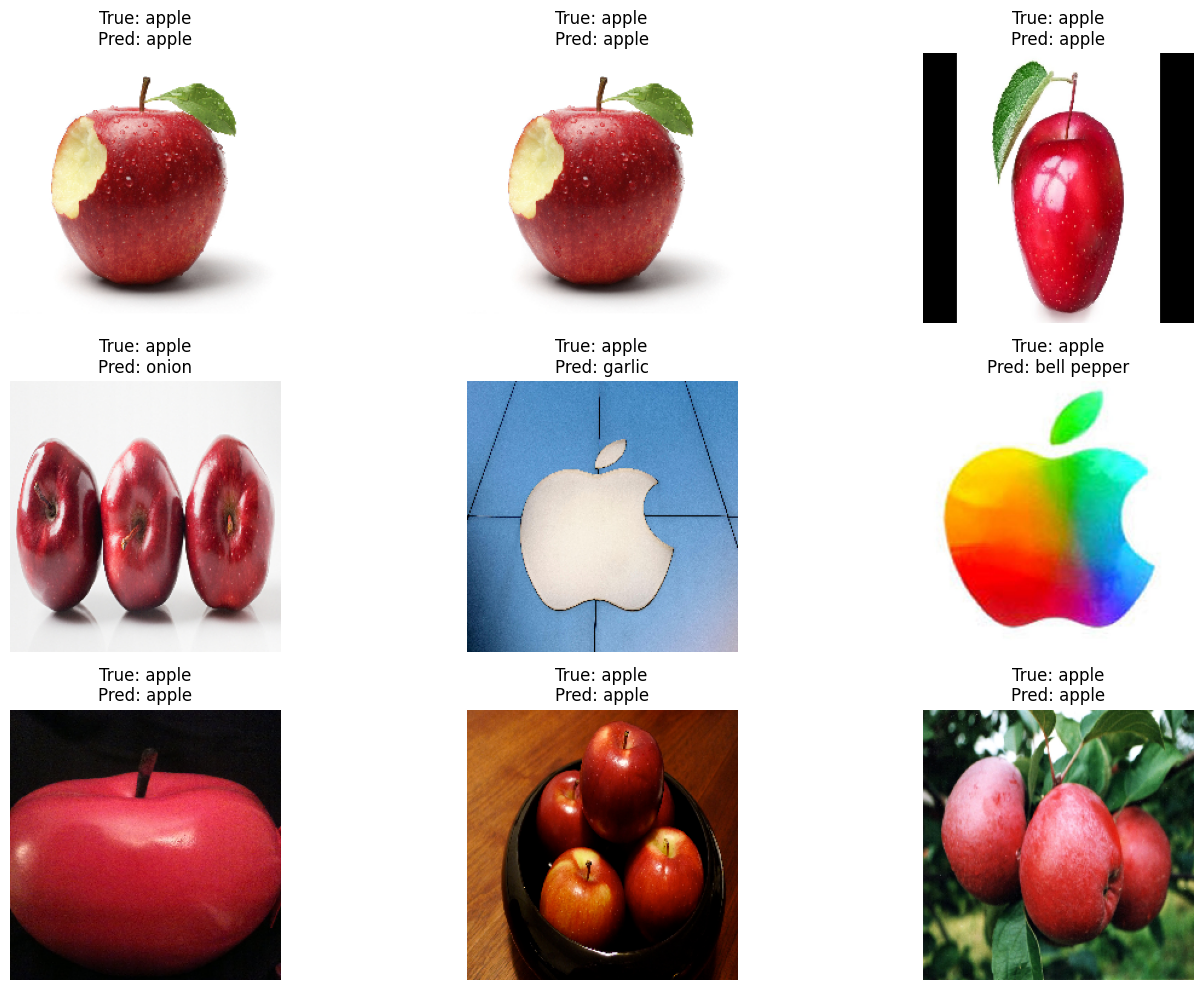

In [47]:

class_labels = list(test_generator.class_indices.keys())
test_images, test_labels = next(test_generator)

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i])
    true_label = class_labels[np.argmax(test_labels[i])]
    pred_label = class_labels[np.argmax(model.predict(test_images[i:i+1]))]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [50]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


callbacks=[early_stop, lr_scheduler]


In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
from sklearn.metrics import accuracy_score

class_accuracy = {}
for i, label in enumerate(class_labels):
    idx = np.where(test_generator.classes == i)
    class_acc = accuracy_score(test_generator.classes[idx], y_pred[idx])
    class_accuracy[label] = class_acc

print("Class-wise Accuracy:")
for label, acc in class_accuracy.items():
    print(f"{label}: {acc:.2f}")


Class-wise Accuracy:
apple: 0.60
banana: 0.78
beetroot: 1.00
bell pepper: 0.70
cabbage: 0.90
capsicum: 0.50
carrot: 0.90
cauliflower: 0.80
chilli pepper: 0.60
corn: 0.00
cucumber: 0.60
eggplant: 0.80
garlic: 1.00
ginger: 0.70
grapes: 0.70
jalepeno: 0.30
kiwi: 0.90
lemon: 0.90
lettuce: 0.70
mango: 0.70
onion: 0.80
orange: 0.80
paprika: 0.60
pear: 0.70
peas: 1.00
pineapple: 1.00
pomegranate: 0.90
potato: 0.50
raddish: 0.90
soy beans: 0.90
spinach: 0.50
sweetcorn: 1.00
sweetpotato: 0.30
tomato: 0.70
turnip: 0.90
watermelon: 0.90


In [55]:
from tensorflow.keras.preprocessing import image
import numpy as np


model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/fruit_veg_cnn_model.keras')

img_path = '/content/drive/MyDrive/Datasets/Fruit_Veg_Dataset/test/watermelon/Image_1.jpg'  # Example: Apple test image


img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

class_indices = train_generator.class_indices
class_labels = dict((v,k) for k,v in class_indices.items())
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predicted Class: watermelon


#uploading exterternal image from test imgs

In [56]:
from google.colab import files
uploaded = files.upload()


Saving Image_1.jpg to Image_1.jpg


#checking for it

In [57]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import os

model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/fruit_veg_cnn_model.keras')

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)


class_indices = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_indices.items())


predicted_label = class_labels[predicted_class[0]]
print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Class: kiwi


#correctly predicted the class , as the img uploaded was of kiwi 